In [1]:
import pandas as pd
import numpy as np

In [2]:
results = pd.read_csv("Context_Clustered.csv")

In [3]:
from sklearn.metrics import silhouette_score

In [6]:
from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [7]:
import seaborn as sns

In [8]:
results.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'Venue ID', 'Latitude',
       'Longitude', 'Venue category name', 'Country code', 'User ID',
       'Timezone', 'Year', 'Month', 'Day', 'Count', 'Count_Scaled',
       'context_MBCluster', 'context_DBScanCluster', 'context_cluster'],
      dtype='object')

In [10]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(results[["Latitude","Longitude"]].values)

In [12]:
results['pca-one'] = pca_result[:,0]
results['pca-two'] = pca_result[:,1] 
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.90903859 0.09096141]


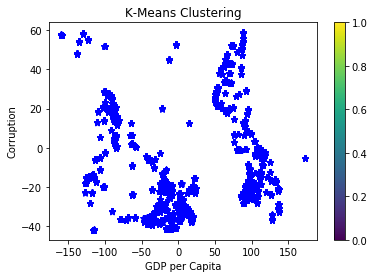

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(pca_result[:,0],pca_result[:,1],c='b',marker='*')
ax.set_title('K-Means Clustering')
ax.set_xlabel('GDP per Capita')
ax.set_ylabel('Corruption')
plt.colorbar(scatter)

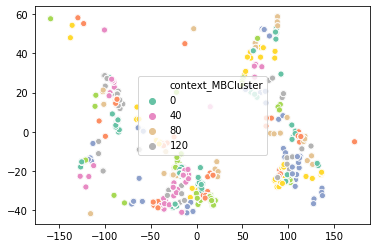

In [17]:
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1], hue=results['context_MBCluster'], 
                palette="Set2")

DBSCAN


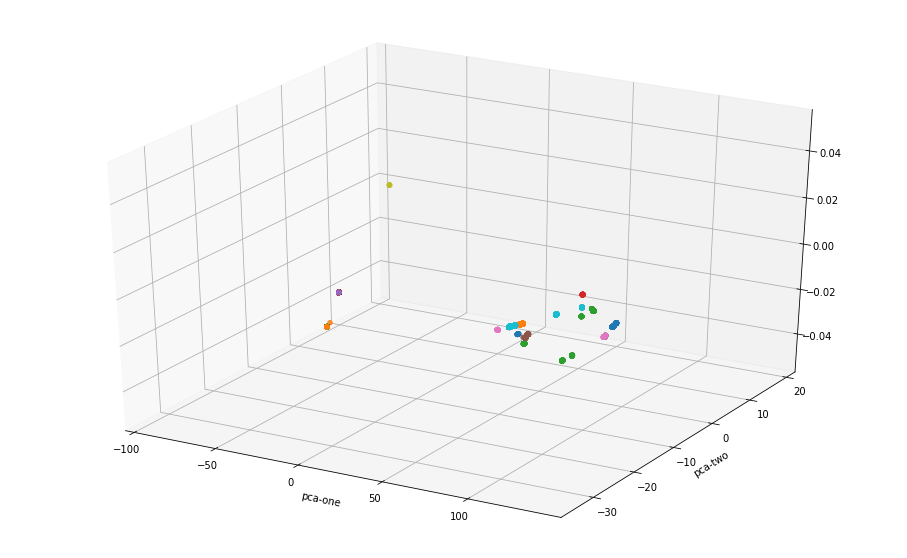

In [21]:
print("DBSCAN")
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=results.loc[:]["pca-one"], 
    ys=results.loc[:]["pca-two"], 
    c=results.loc[:]["context_cluster"], 
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
plt.show()

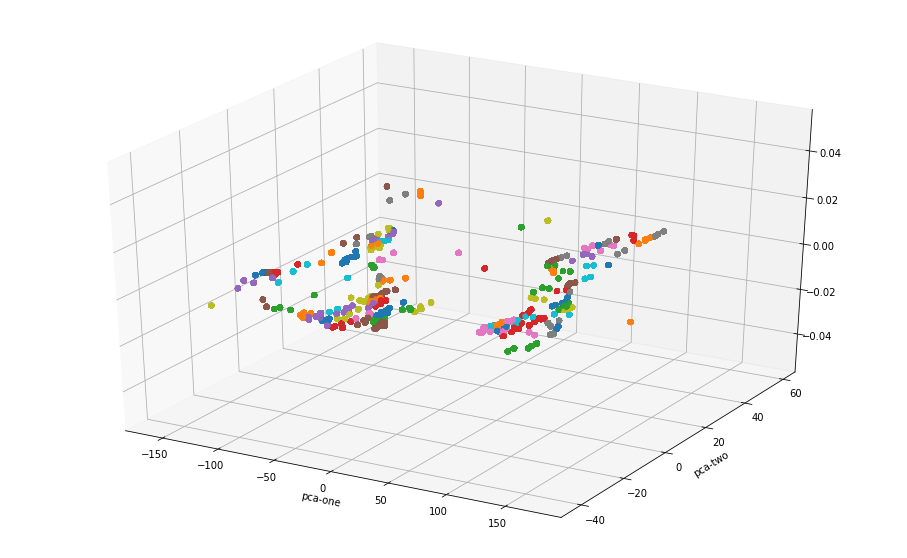

In [19]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=results.loc[:]["pca-one"], 
    ys=results.loc[:]["pca-two"], 
    c=results.loc[:]["context_MBCluster"], 
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
plt.show()